In [16]:
import matplotlib.pyplot as plt
import numpy as np


In [17]:
import tensorflow as tf
print("TensorFlow version: {}".format(tf.__version__))
print("Keras version: {}".format(tf.keras.__version__))

TensorFlow version: 2.8.0
Keras version: 2.8.0


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
# from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [19]:
#Let us extract data available from cifar 
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


print("The size of training dataset is: ", X_train.shape)
print("The size of testing dataset is: ", X_test.shape)
print("The size of training dataset y is: ", y_train.shape)
print("The size of testing dataset y is: ", y_test.shape)

The size of training dataset is:  (50000, 32, 32, 3)
The size of testing dataset is:  (10000, 32, 32, 3)
The size of training dataset y is:  (50000, 1)
The size of testing dataset y is:  (10000, 1)


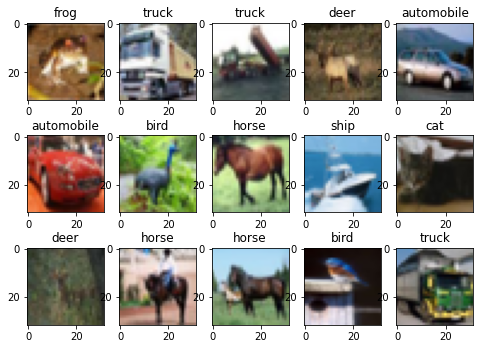

In [20]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


#view few images
plt.figure(figsize=(8,10))
for i in range(15):
  plt.subplot(5,5,i+1)   #330+1+i
  plt.imshow(X_train[i])
  plt.title(classes[int(y_train[i])])
plt.show()

In [21]:
counts = np.unique(y_train, return_counts=True)[1]
counts

array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000])

Text(0.5, 1.0, 'Class distribution in training set')

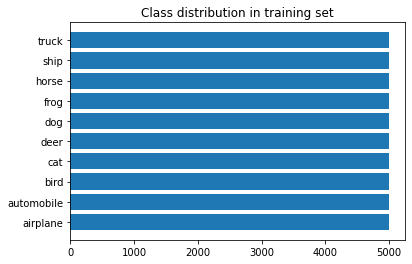

In [22]:
plt.barh(classes, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

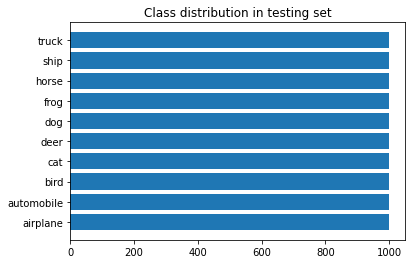

In [23]:
counts = np.unique(y_test, return_counts=True)[1]
plt.barh(classes, counts)
plt.title('Class distribution in testing set')

In [24]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

from tensorflow.keras.utils import to_categorical
# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)


In [28]:
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_18 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_19 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                      

In [30]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
                     
checkpoint = ModelCheckpoint("/content/Trained Models/cnn_model.h5",
                             monitor="val_accuracy",
                             mode="max",
                             save_best_only = True,
                             verbose=1)
#Use Mode = max for accuracy and min for loss. 

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

In [31]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [32]:
histroy = model.fit(train_generator, 
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
               callbacks=callbacks,
#               batch_size=batch_size,
             )

Epoch 1/50
1562/1562 [==============================] - ETA: 0s - loss: 1.6350 - accuracy: 0.4123 - precision: 0.5983 - recall: 0.2119
Epoch 1: val_accuracy improved from -inf to 0.50110, saving model to /content/Trained Models/cnn_model.h5
1562/1562 [==============================] - 61s 32ms/step - loss: 1.6350 - accuracy: 0.4123 - precision: 0.5983 - recall: 0.2119 - val_loss: 1.4007 - val_accuracy: 0.5011 - val_precision: 0.6448 - val_recall: 0.3551
Epoch 2/50
1561/1562 [============================>.] - ETA: 0s - loss: 1.2516 - accuracy: 0.5571 - precision: 0.7150 - recall: 0.3914
Epoch 2: val_accuracy improved from 0.50110 to 0.60680, saving model to /content/Trained Models/cnn_model.h5
1562/1562 [==============================] - 48s 31ms/step - loss: 1.2516 - accuracy: 0.5572 - precision: 0.7151 - recall: 0.3915 - val_loss: 1.0813 - val_accuracy: 0.6068 - val_precision: 0.7242 - val_recall: 0.4962
Epoch 3/50
1561/1562 [============================>.] - ETA: 0s - loss: 1.0795 - 

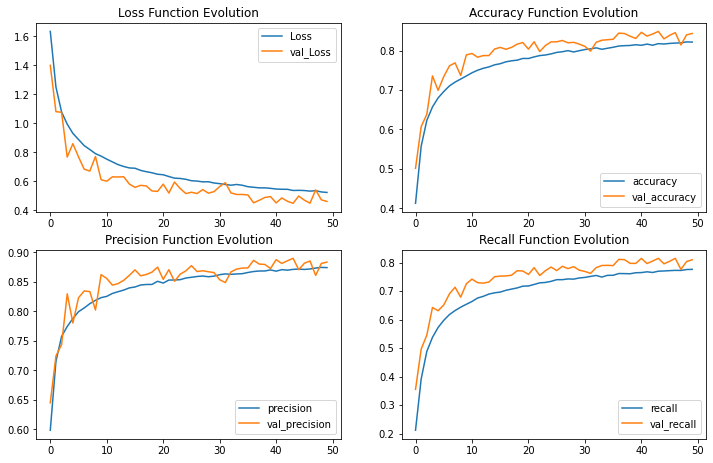

In [33]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(histroy.history['loss'], label='Loss')
plt.plot(histroy.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(histroy.history['accuracy'], label='accuracy')
plt.plot(histroy.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(histroy.history['precision'], label='precision')
plt.plot(histroy.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(histroy.history['recall'], label='recall')
plt.plot(histroy.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [34]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 3s 8ms/step - loss: 0.4615 - accuracy: 0.8434 - precision: 0.8835 - recall: 0.8097
Test Accuracy : 84.34%


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[861   8   6   5   5   4   9   3  70  29]
 [  4 908   0   2   2   1   3   1  28  51]
 [ 73   2 700  22  37  46  88  10  12  10]
 [ 15   2  29 655  46 123  83  17  12  18]
 [ 17   0  22  23 841  12  58  15   9   3]
 [  8   2  21  80  32 792  36  17   3   9]
 [  6   0  10  15   5   4 951   1   6   2]
 [ 13   0   8  21  32  36  20 854   3  13]
 [ 24   8   1   3   0   1   3   0 946  14]
 [ 10  26   1   4   0   0   8   1  24 926]]


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.95      0.91      0.93      1000
           2       0.88      0.70      0.78      1000
           3       0.79      0.66      0.72      1000
           4       0.84      0.84      0.84      1000
           5       0.78      0.79      0.78      1000
           6       0.76      0.95      0.84      1000
           7       0.93      0.85      0.89      1000
           8       0.85      0.95      0.90      1000
           9       0.86      0.93      0.89      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



In [37]:
y_pred = model.predict(X_test[:15])
y_classes = [np.argmax(element) for element in y_pred]
y_classes

[5, 8, 8, 8, 6, 6, 1, 6, 3, 1, 0, 9, 4, 7, 9]

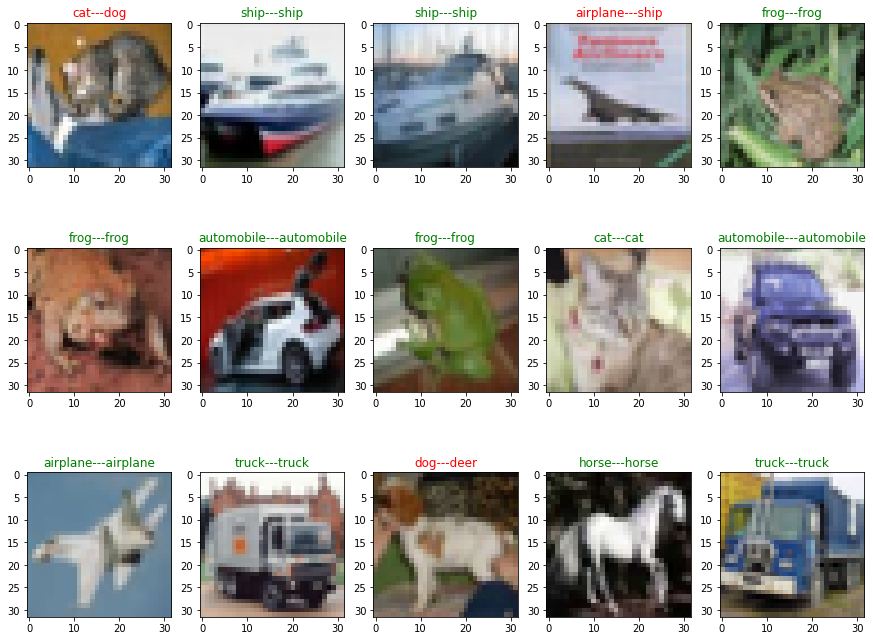

In [38]:
#view few images
plt.figure(figsize=(15,20))
for i in range(15):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i])
  if int(y_test[i])== int(y_classes[i]):
    plt.title(classes[int(y_test[i])]+"---"+classes[int(y_classes[i])],color='g')
  else:
    plt.title(classes[int(y_test[i])]+"---"+classes[int(y_classes[i])],color='r') 
plt.show()

In [39]:
model.save('/content/Trained Models/cnn_saved.h5') 